# Effect of Power Plant Features on Their Electricity Generation.
## by Gladens Popoola

## Investigation Overview

> In this investigation, I want to find out what features affect electricity generation in 2017 as well as the features that influence estimated electricity generation in 2017. The focus was mainly on country, capacity_mw, primary_fuel, generation_gwh_2017, and estimated_generation_gwh_2017.

## Dataset Overview

> There are 34936 power plants in the dataset with 36 features(country, country_long, name, gppd_idnr, capacity_mw, latitude, longitude, primary_fuel, other_fuel1, other_fuel2, other_fuel3, commissioning_year, owner, source, url, geolocation_source, wepp_id, year_of_capacity_data, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, generation_gwh_2019, generation_data_source, estimated_generation_gwh_2013, estimated_generation_gwh_2014, estimated_generation_gwh_2015, estimated_generation_gwh_2016, estimated_generation_gwh_2017, estimated_generation_note_2013, estimated_generation_note_2014, estimated_generation_note_2015, estimated_generation_note_2016, estimated_generation_note_2017). For my analysis, I'll be focusing on the generation and estimated generation for the year 2017 alone so I'll be making use of the following columns: country_long, name, capacity_mw, primary_fuel, generation_gwh_2017, and estimated_generation_gwh_2017. So I created a new dataframe called power_plant_2017 containing these columns only. This dataframe contains 33007 power plants and 6 features(needed for my analysis). Of the 6 features, 3 are categorical and 3 are numerical.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe and then do some data cleaning.
power_plant = pd.read_csv('global_power_plant_database.csv')


power_plant_2017 = power_plant[['country_long', 'name', 'capacity_mw', 'primary_fuel', 'generation_gwh_2017', 
                                'estimated_generation_gwh_2017']]
power_plant_2017.rename(columns={'country_long': 'country', 'name': 'powerplant_name'}, inplace=True)


null = power_plant_2017[power_plant_2017.estimated_generation_gwh_2017.isnull()]
idx = list(null.index)
power_plant_2017 = power_plant_2017.drop(idx)

negative = power_plant_2017[power_plant_2017.generation_gwh_2017 < 0]
idx = list(negative.index)
power_plant_2017 = power_plant_2017.drop(idx)

median = power_plant_2017.generation_gwh_2017.median()
power_plant_2017.fillna(median, inplace = True)

## Distribution of generation_gwh_2017

generation_gwh_2017 has a somewhat rightly-skewed distribution and it is unimodal.

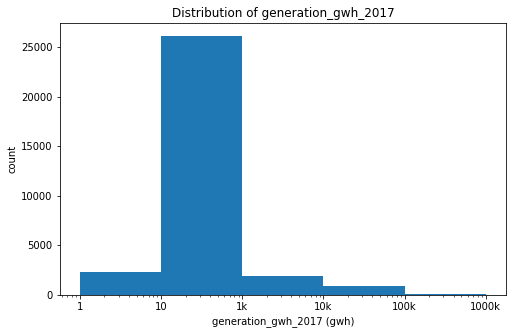

In [3]:
log_binsize = 1.0
bins = 10 ** np.arange(0, np.log10(power_plant_2017['generation_gwh_2017'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = power_plant_2017, x = 'generation_gwh_2017', bins = bins)
plt.xscale('log')
plt.xticks([1e0, 1e1, 1e2, 1e3, 1e4, 1e5], [1, 10, '1k', '10k', '100k', '1000k'])
plt.xlabel('generation_gwh_2017 (gwh)')
plt.ylabel('count')
plt.title('Distribution of generation_gwh_2017');
plt.show()

## Distribution of estimated_generation_gwh_2017

estimated_generation_gwh_2017 has arightly-skewed distribution and it is unimodal.

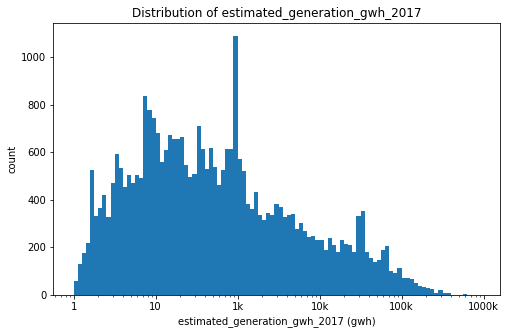

In [4]:
log_binsize = 0.05
bins = 10 ** np.arange(0, np.log10(power_plant_2017['estimated_generation_gwh_2017'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = power_plant_2017, x = 'estimated_generation_gwh_2017', bins = bins)
plt.xscale('log')
plt.xticks([1e0, 1e1, 1e2, 1e3, 1e4, 1e5], [1, 10, '1k', '10k', '100k', '1000k'])
plt.xlabel('estimated_generation_gwh_2017 (gwh)')
plt.ylabel('count')
plt.title('Distribution of estimated_generation_gwh_2017');
plt.show()

## Distribution of capacity_mw

capacity_mw has a rightly-skewed distribution and it is unimodal.

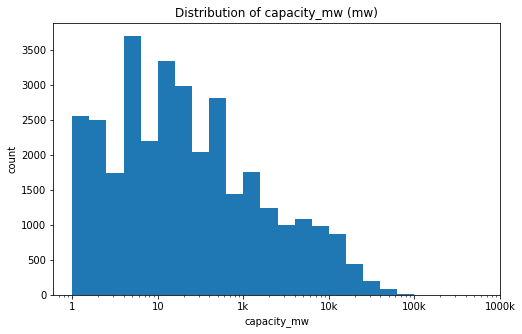

In [5]:
log_binsize = 0.2
bins = 10 ** np.arange(0, np.log10(power_plant_2017['capacity_mw'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = power_plant_2017, x = 'capacity_mw', bins = bins)
plt.xscale('log')
plt.xticks([1e0, 1e1, 1e2, 1e3, 1e4, 1e5], [1, 10, '1k', '10k', '100k', '1000k'])
plt.xlabel('capacity_mw')
plt.ylabel('count')
plt.title('Distribution of capacity_mw (mw)');
plt.show()

In [6]:
# compute the logarithm of numerical features for other modeling and plotting
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

power_plant_2017['log_capacity_mw'] = power_plant_2017['capacity_mw'].apply(log_trans)
power_plant_2017['log_generation_gwh_2017'] = power_plant_2017['generation_gwh_2017'].apply(log_trans)
power_plant_2017['log_estimated_generation_gwh_2017'] = power_plant_2017['estimated_generation_gwh_2017'].apply(log_trans)

## Relationship between capacity_mw and generation_gwh_2017

There is a positive correlation between both features. Also, there are some of the plots that form a straight line somewhere in the middle of the scatterplot.

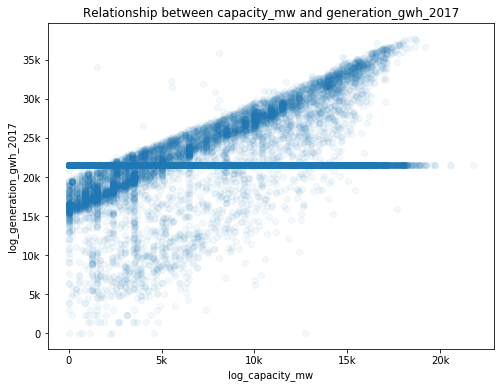

In [7]:
plt.figure(figsize = [8, 6])

sns.regplot(data = power_plant_2017, x = 'log_capacity_mw', y = 'log_generation_gwh_2017', scatter_kws = {'alpha': 1/20});
plt.xticks([0, 1, 2, 3, 4], [0, '5k', '10k', '15k', '20k']);
plt.yticks([-3, -2, -1, 0, 1, 2, 3, 4], [0, '5k', '10k', '15k', '20k', '25k', '30k', '35k']);
plt.title('Relationship between capacity_mw and generation_gwh_2017');

## Relationship between capacity_mw and estimated_generation_gwh_2017

There is a very strong positive correlation between the two features.

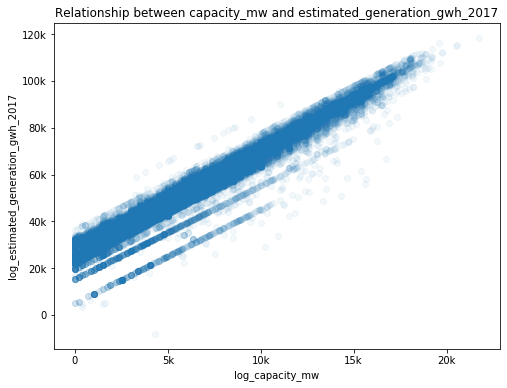

In [8]:
plt.figure(figsize = [8, 6])

sns.regplot(data = power_plant_2017, x = 'log_capacity_mw', y = 'log_estimated_generation_gwh_2017', 
            scatter_kws = {'alpha': 1/20});
plt.xticks([0, 1, 2, 3, 4], [0, '5k', '10k', '15k', '20k']);
plt.yticks([-1, 0, 1, 2, 3, 4, 5], [0, '20k', '40k', '60k', '80k', '100k', '120k']);
plt.title('Relationship between capacity_mw and estimated_generation_gwh_2017');

In [9]:
order = power_plant_2017['country'].value_counts()
top_country_by_count = list(order.index[:10])
top_countries_by_total_plants = power_plant_2017[power_plant_2017.country.isin(['United States of America', 'China', 
                                                                                'United Kingdom', 'France', 'Brazil', 
                                                                                'India', 'Germany', 'Canada', 'Spain', 
                                                                                'Russia'])]


top_countries_by_total_plants['log_capacity_mw'] = top_countries_by_total_plants['capacity_mw'].apply(log_trans)
top_countries_by_total_plants['log_generation_gwh_2017'] = top_countries_by_total_plants['generation_gwh_2017'].apply(log_trans)
top_countries_by_total_plants['log_estimated_generation_gwh_2017'] = top_countries_by_total_plants['estimated_generation_gwh_2017'].apply(log_trans)

## Distribution of estimated_generation_gwh_2017 by country and primary_fuel

Power plants using Nuclear primary_fuel have the highest estimated_generation_gwh_2017 and those using Waste as their primary_fuel, have the lowest average estimated_generation_gwh_2017. Also, country has no influence on estimated_generation_gwh_2017.

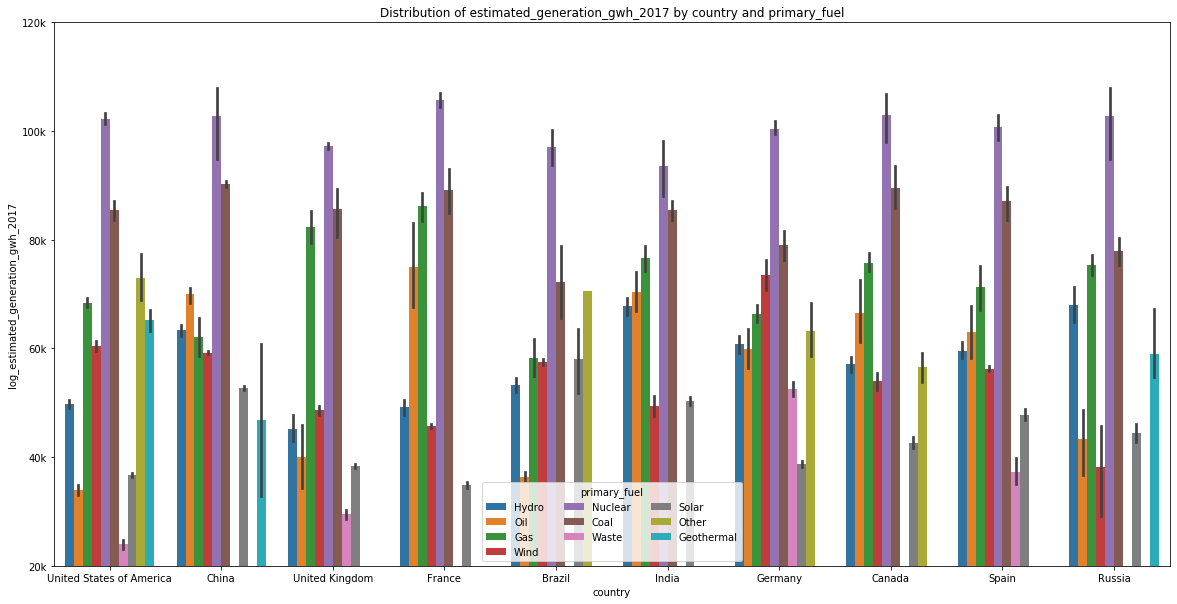

In [10]:
plt.figure(figsize = [20, 10])
order = top_countries_by_total_plants['country'].value_counts().index

sns.barplot(data = top_countries_by_total_plants, x = 'country', y = 'log_estimated_generation_gwh_2017', 
              hue = 'primary_fuel', order = order);
plt.yticks([0, 1, 2, 3, 4, 5], ['20k', '40k', '60k', '80k', '100k', '120k']);
plt.legend(loc = 8, ncol = 3, title = 'primary_fuel');
plt.title('Distribution of estimated_generation_gwh_2017 by country and primary_fuel');

In [1]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 554135 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Gladens\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Gladens\anaconda3\lib\site-packages\jupyter_core\application.py", line 268, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Gladens\anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\Gladens\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\Users\Gladens\anaconda3\lib\site-packages\nbconver